In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

# Flattening

In [3]:
files= np.loadtxt('l1data.txt', dtype='str')
darks = np.loadtxt('darksl1.txt', dtype='str')
allimagedata = [fits.getdata(f) for f in files]
darksimages = [fits.getdata(f) for f in darks]
darksmedia = np.median(darksimages, axis=0)
flatteddatal1 = allimagedata - darksmedia

We plot an example one

<matplotlib.colorbar.Colorbar instance at 0x7fb23fc2f8c0>

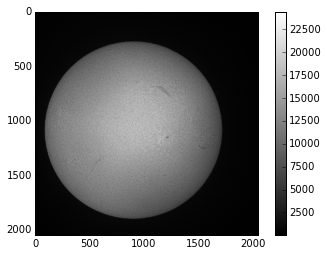

In [4]:
plt.imshow(flatteddatal1[0],cmap='gray')
plt.colorbar()

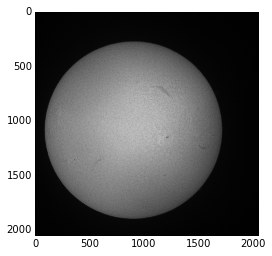

In [5]:
plt.imshow(allimagedata[0],cmap='gray')

We can make a fit file with the new flatten data. 

In [ ]:
for i in range(109):
    fits.writeto(files[i]+'processed',flatteddatal1[i],header=fits.open(files[i])[0].header)

In [ ]:
onefit=fits.getdata('imoa_06563_l1_20160126_12284100_b1.ftsprocessed')
headerone=fits.open('imoa_06563_l1_20160126_12284100_b1.ftsprocessed')[0].header
plt.imshow(onefit,cmap='gray')
plt.colorbar()

In [ ]:
headerone

# Brillance

We create the median of all the flatted data.

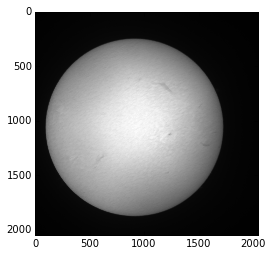

In [6]:
medianflattedl1 = np.median(flatteddatal1, axis=0)
plt.imshow(medianflattedl1,cmap='gray')

We can now mask to get only the disk of the Sun. For l1 we decide a threshold of 900 *adu*. We create the mask and put to zero all below 900. The mask looks like

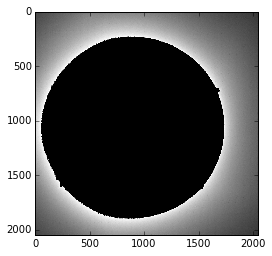

In [7]:
maskl1 = medianflattedl1 < 800 
maskedl1=(np.where(maskl1,1,0))*medianflattedl1
plt.imshow(maskedl1, cmap='gray')

The resulting masked image looks like:

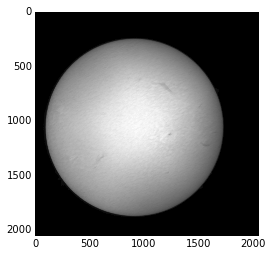

In [8]:
maskl1 = medianflattedl1 < 900 
maskedl1=(np.where(maskl1,0,1))*medianflattedl1
plt.imshow(maskedl1, cmap='gray')


Now we calculate the total of the masked image to get the luminosity of the Sun:
    

In [18]:
totall1 = np.sum(maskedl1)
print(totall1)

27641806601.0


# Brillance Calibration

Above we have found the total luminosity in $H\alpha$ from the Sun disk. We know that the total luminosity of the Sun in $H\alpha$ should be 1.59 W/m/nm. With this we can calibrate each pixel.

In [12]:
call1 = 1.59/totall1
call1=call1 * flatteddatal1

We can plot one to verify:

<matplotlib.colorbar.Colorbar instance at 0x7fb1cb96f050>

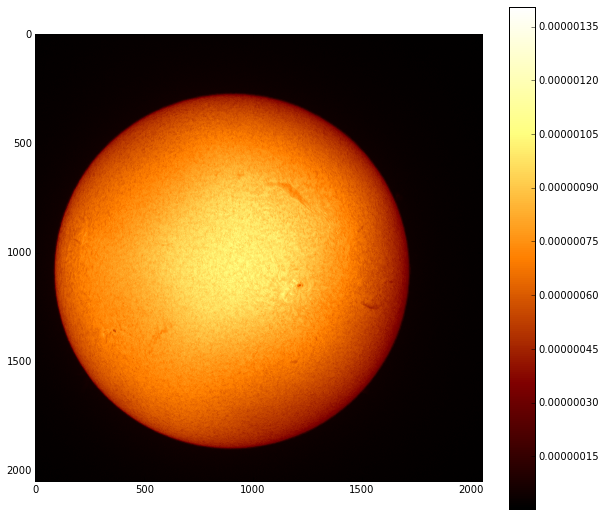

In [17]:
plt.figure(num=None, figsize=(10, 9))
plt.imshow(call1[0],cmap='afmhot')
plt.colorbar()